In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install openpyxl

In [5]:
filepath = "/content/large_gerd_dataset.xlsx"

In [6]:
df = pd.read_excel(filepath)

In [7]:
df.head()

Patient_ID  Age Gender   BMI                              Symptoms  \
0           1   56      M  20.5             Chronic cough, Hoarseness   
1           2   69      M  30.6  Heartburn, Regurgitation, Chest pain   
2           3   46      F  21.7           Nausea, Chronic sore throat   
3           4   32      M  20.4     Chest pain, Difficulty swallowing   
4           5   60      M  25.5     Chest pain, Difficulty swallowing   

   Duration_of_Symptoms_(months) Smoking_Status Alcohol_Consumption  \
0                             17             No                 NaN   
1                             16             No             Regular   
2                              2            Yes                 NaN   
3                             34            Yes             Regular   
4                              8             No          Occasional   

  Medication_Use     Endoscopy_Result  
0    H2 Blockers  Barrett's esophagus  
1           PPIs  Barrett's esophagus  
2       Antacids          Esophagitis  
3    H2 Blockers          Esophagitis  
4           PPIs               Normal

In [8]:
df.tail()

Patient_ID  Age Gender   BMI                           Symptoms  \
995         996   18      M  23.7          Chronic cough, Hoarseness   
996         997   35      F  31.2        Nausea, Chronic sore throat   
997         998   49      F  19.9          Chronic cough, Hoarseness   
998         999   64      M  22.4        Nausea, Chronic sore throat   
999        1000   66      F  30.6  Chest pain, Difficulty swallowing   

     Duration_of_Symptoms_(months) Smoking_Status Alcohol_Consumption  \
995                             27            Yes             Regular   
996                             16            Yes                 NaN   
997                             15             No             Regular   
998                             35            Yes          Occasional   
999                             12            Yes             Regular   

    Medication_Use Endoscopy_Result  
995    H2 Blockers      Esophagitis  
996            NaN           Normal  
997       Antacids           Normal  
998            NaN           Normal  
999    H2 Blockers           Normal

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_ID                     1000 non-null   int64  
 1   Age                            1000 non-null   int64  
 2   Gender                         1000 non-null   object 
 3   BMI                            1000 non-null   float64
 4   Symptoms                       1000 non-null   object 
 5   Duration_of_Symptoms_(months)  1000 non-null   int64  
 6   Smoking_Status                 1000 non-null   object 
 7   Alcohol_Consumption            680 non-null    object 
 8   Medication_Use                 740 non-null    object 
 9   Endoscopy_Result               1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [10]:
summary_stats = df.describe()
print(summary_stats)

        Patient_ID          Age          BMI  Duration_of_Symptoms_(months)
count  1000.000000  1000.000000  1000.000000                    1000.000000
mean    500.500000    49.857000    26.656800                      18.059000
std     288.819436    18.114267     4.735231                       9.943661
min       1.000000    18.000000    18.500000                       1.000000
25%     250.750000    35.000000    22.400000                      10.000000
50%     500.500000    50.000000    26.800000                      18.000000
75%     750.250000    66.000000    30.800000                      27.000000
max    1000.000000    79.000000    34.900000                      35.000000


In [11]:
# Checking Missing Value
df.isna().sum()

Patient_ID                         0
Age                                0
Gender                             0
BMI                                0
Symptoms                           0
Duration_of_Symptoms_(months)      0
Smoking_Status                     0
Alcohol_Consumption              320
Medication_Use                   260
Endoscopy_Result                   0
dtype: int64

In [12]:
df['Medication_Use'].head()

0    H2 Blockers
1           PPIs
2       Antacids
3    H2 Blockers
4           PPIs
Name: Medication_Use, dtype: object

In [13]:
df['Alcohol_Consumption'].head()

0           NaN
1       Regular
2           NaN
3       Regular
4    Occasional
Name: Alcohol_Consumption, dtype: object

In [14]:
# Handling Missing Value
df['Medication_Use'].fillna('Unknown', inplace=True)
df['Alcohol_Consumption'].fillna('NaN', inplace= True)

In [15]:
df.isna().sum()

Patient_ID                       0
Age                              0
Gender                           0
BMI                              0
Symptoms                         0
Duration_of_Symptoms_(months)    0
Smoking_Status                   0
Alcohol_Consumption              0
Medication_Use                   0
Endoscopy_Result                 0
dtype: int64

In [16]:
# Grouping by gender and calculating mean BMI
mean_bmi_by_gender = df.groupby("Gender")["BMI"].mean()
print(mean_bmi_by_gender)

Gender
F    26.910692
M    26.425239
Name: BMI, dtype: float64


EDA

In [19]:
df['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Regular       345
Occasional    335
NaN           320
Name: count, dtype: int64

LABEL ENCODER


In [23]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [33]:
Alcohol_Consumption = LabelEncoder.fit_transform(df['Alcohol_Consumption'])
Gender = LabelEncoder.fit_transform(df['Gender'])
Medication_Use = LabelEncoder.fit_transform(df['Medication_Use'])
BMI = LabelEncoder.fit_transform(df['BMI'])
Smoking_Status = LabelEncoder.fit_transform(df['Smoking_Status'])
Endoscopy_Result = LabelEncoder.fit_transform(df['Endoscopy_Result'])
Symptoms = LabelEncoder.fit_transform(df['Symptoms'])

df['Alcohol_Consumption']= Alcohol_Consumption
df['Gender']= Gender
df['Medication_Use']= Medication_Use
df['BMI']= BMI
df['Smoking_Status']= Smoking_Status
df['Endoscopy_Result']= Endoscopy_Result
df['Symptoms']= Symptoms







In [34]:
df['Smoking_Status'].value_counts()

Smoking_Status
1    509
0    491
Name: count, dtype: int64

In [37]:
pip install matplotlib seaborn

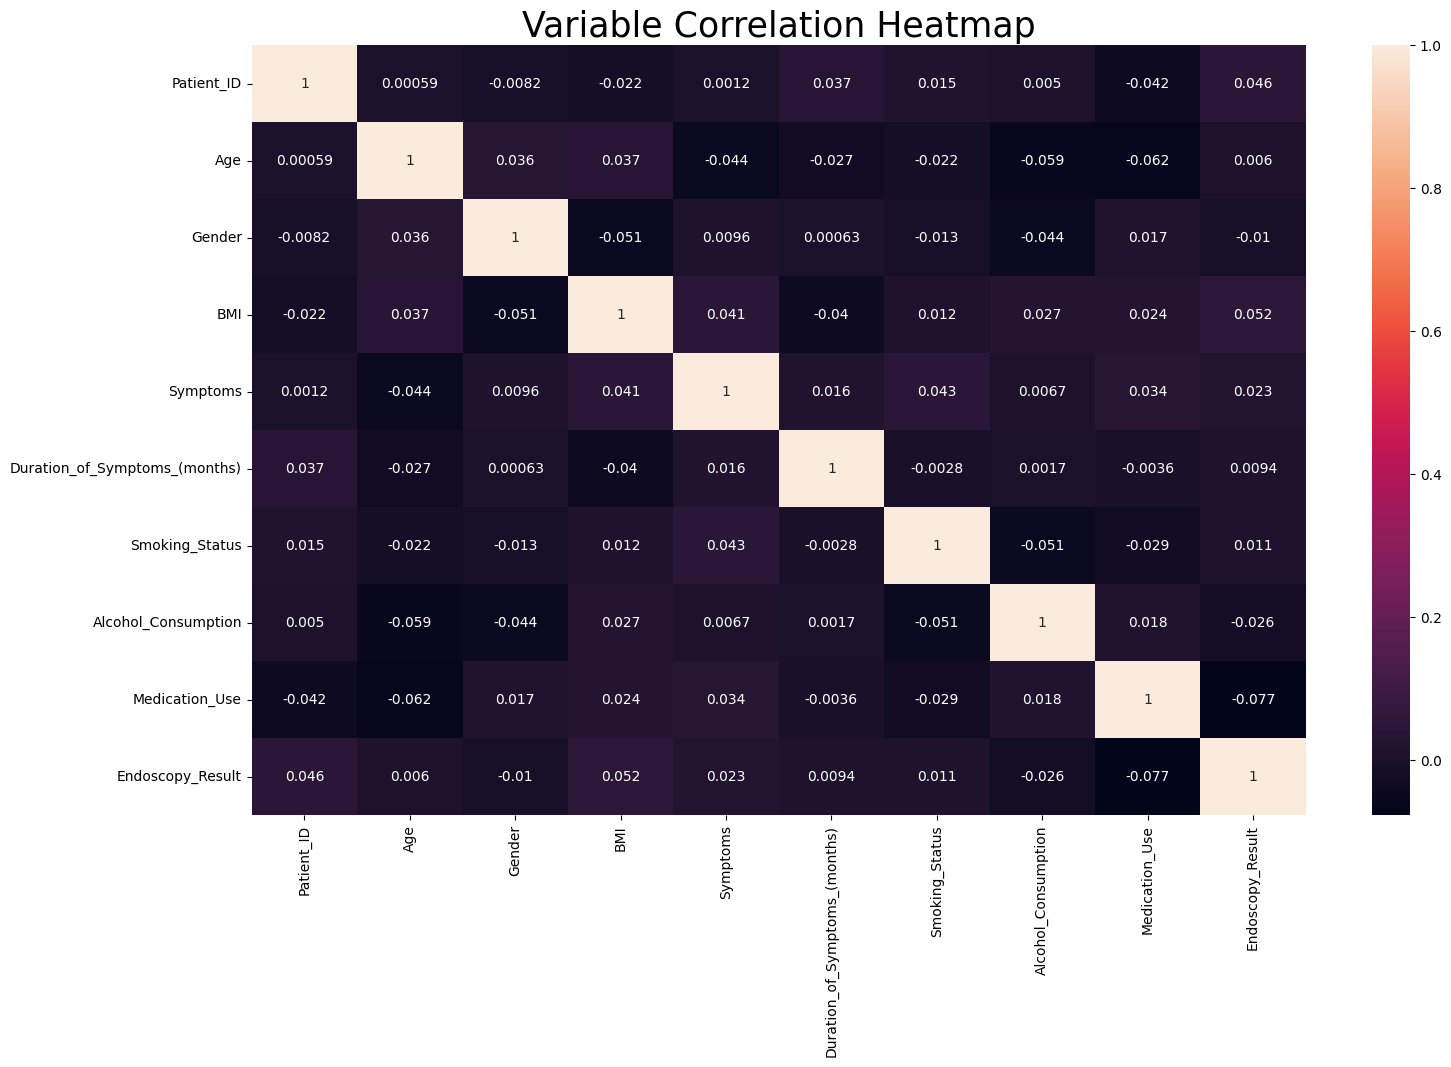

In [38]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Variable Correlation Heatmap',fontsize=25)
plt.show()

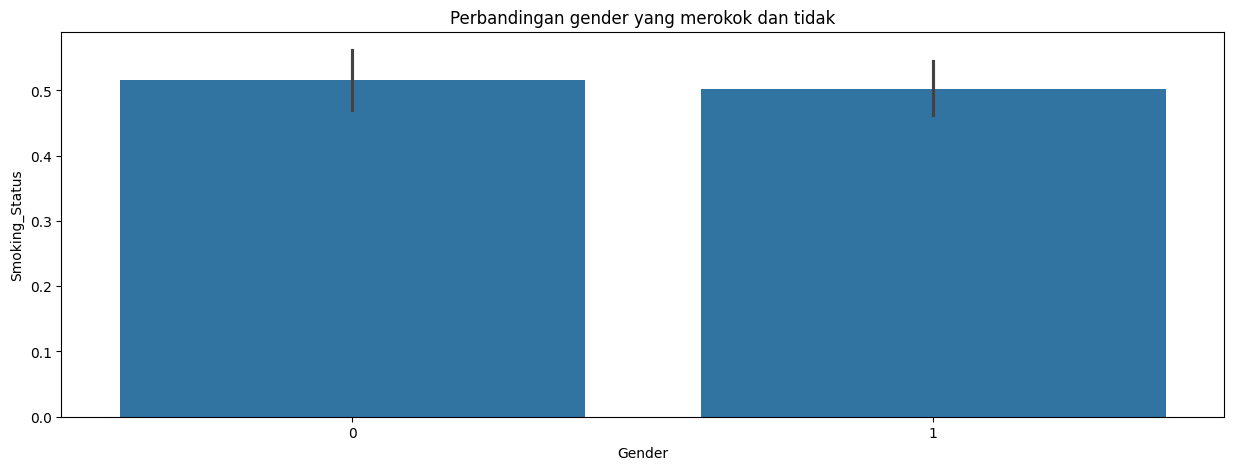

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x='Gender',y='Smoking_Status',data=df)
plt.title('Perbandingan gender yang merokok dan tidak')
plt.xlabel('Gender')
plt.ylabel('Smoking_Status')
plt.show()

Pada data diatas dapat disimpulkan bahwa gender laki-laki lebih cenderung untuk merokok daripada perempuan

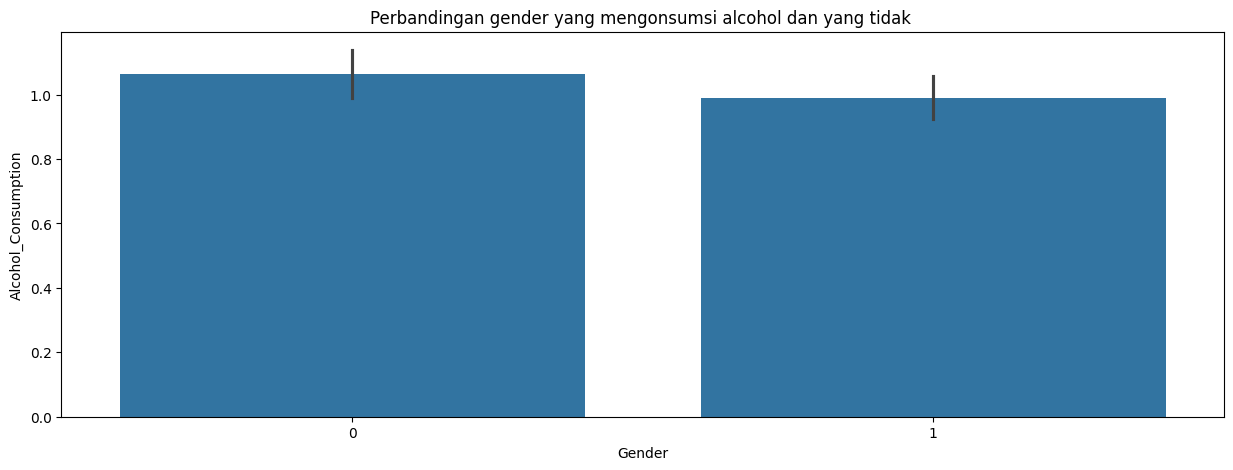

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x='Gender',y='Alcohol_Consumption',data=df)
plt.title('Perbandingan gender yang mengonsumsi alcohol dan yang tidak ')
plt.xlabel('Gender')
plt.ylabel('Alcohol_Consumption')
plt.show()

Pada chart diatas kita juga bisa melihat bahwa gender laki-laki lebih banyak yang mengonsumsi minuman yang beralcohol daripada gender perempuan

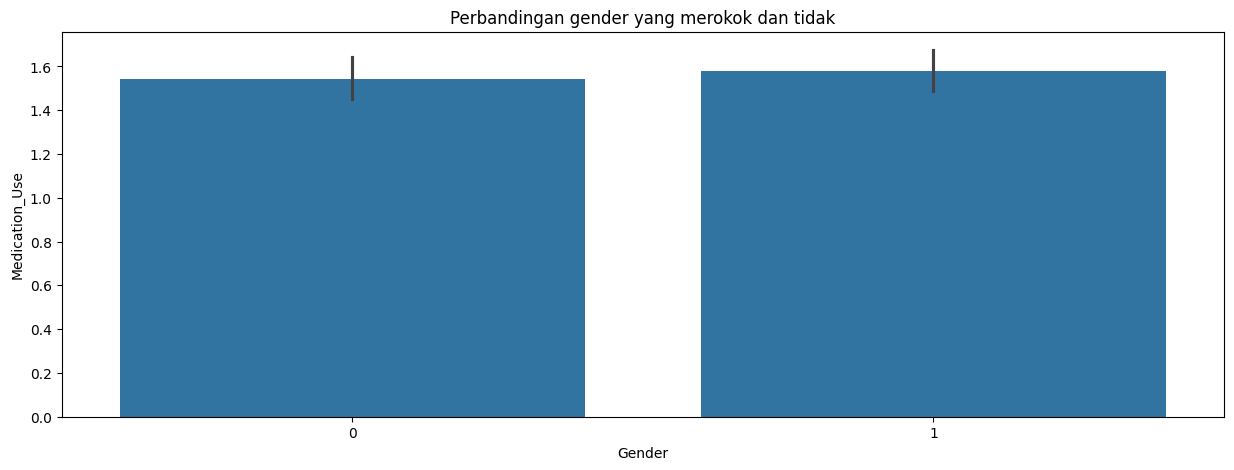

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x='Gender',y='Medication_Use',data=df)
plt.title('Perbandingan gender yang menggunakan obat dan tidak')
plt.xlabel('Gender')
plt.ylabel('Medication_Use')
plt.show()

Pada data tersebut bisa disimpulkan bahwa gender perempuan lebih banyak mengonsumsi obat daripada gender laki-laki, tetapi data yang dihasilkan cukup serupa

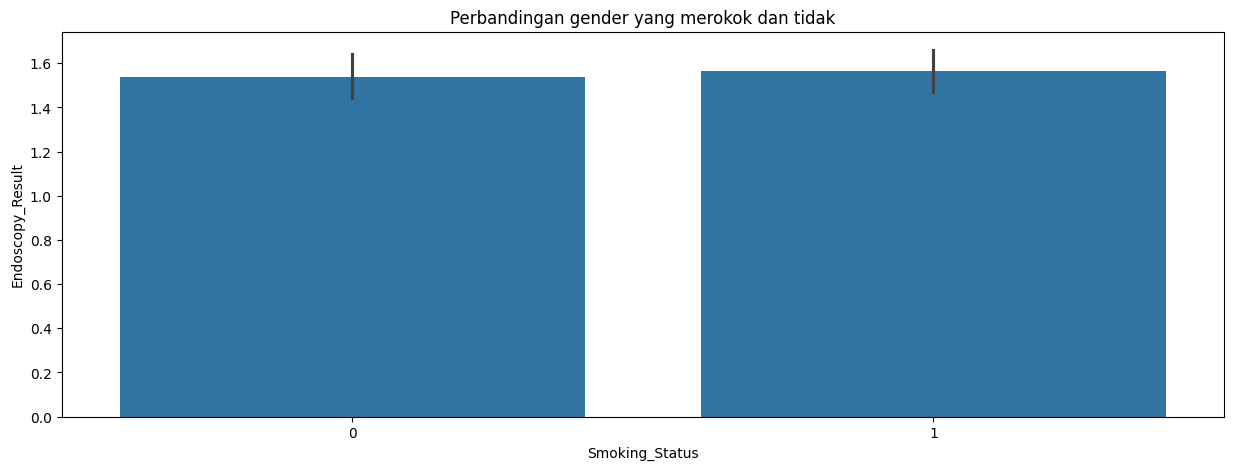

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x='Smoking_Status',y='Endoscopy_Result',data=df)
plt.title('Perbandingan orang yang merokok dan status dari endoskopi ')
plt.xlabel('Smoking_Status')
plt.ylabel('Endoscopy_Result')
plt.show()

Data tersebut menunjukan orang yang mengonsumsi rokok memiliki hasil yang buruk daripada orang yagn tidak merokok

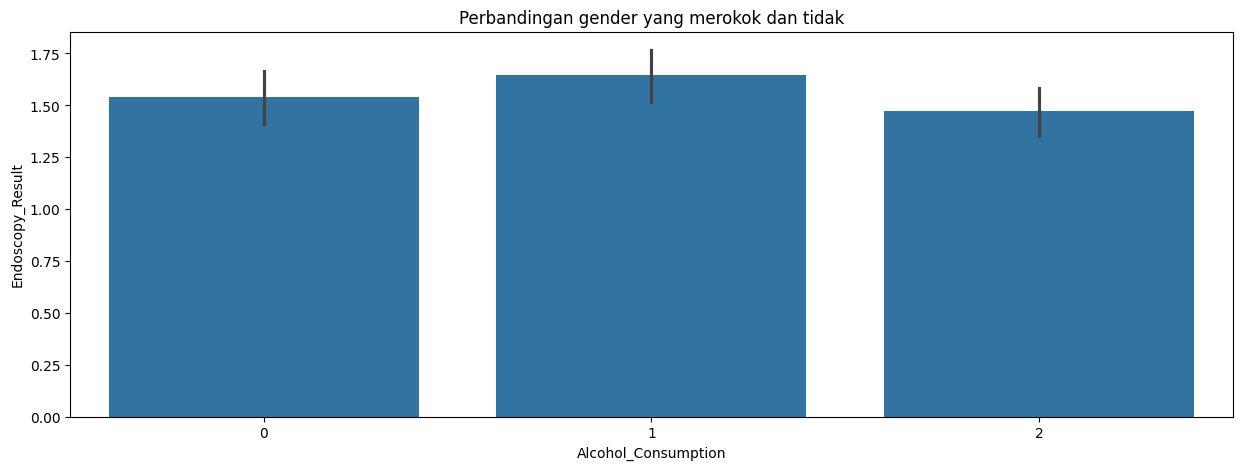

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x='Alcohol_Consumption',y='Endoscopy_Result',data=df)
plt.title('Perbandinganorang yang mengonsumsi alcohol dengan hasil dari endoskopi')
plt.xlabel('Alcohol_Consumption')
plt.ylabel('Endoscopy_Result')
plt.show()

Data tersebut menunjukan bahwa 0 adalah orang yang mengonsumsi alcohol secara regular, nomor 1 adalah orang yang tidak mengonsumsi alcohol , dan nomor 2 adalah orang yang mengonsumsi alcohol occasionally. Bisa dilihat dari data bahwa orang yang mengonsumsi alcohol secara regular memiliki nilai endoscopy yang lebih tinggi, dan kedua tertinggi adalah orang yang tidak mengonsumsi alcohol, dan yang terakhir adalah oran yang mengonsumsi alcohol secara occasionally

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x='Medication_Use',y='Endoscopy_Result',data=df)
plt.title('Perbandingan pengguna obat terhadap hasil dari endoskopi')
plt.xlabel('Medication_Use')
plt.ylabel('Endoscopy_Result')
plt.show()